<a href="https://colab.research.google.com/github/sergiomora03/AdvancedTopicsAnalytics/blob/main/exercises/E5-NeuralNetworksKerasNLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Excercise 5
## NLP with Keras

Use keras framework to solve the below exercises.


In [1]:
!pip uninstall keras --y
!pip install keras==3.2.0

Found existing installation: keras 3.2.0
Uninstalling keras-3.2.0:
  Successfully uninstalled keras-3.2.0
  Using cached keras-3.2.0-py3-none-any.whl.metadata (5.6 kB)
Using cached keras-3.2.0-py3-none-any.whl (1.1 MB)


In [2]:
!pip install wget
!pip install livelossplot --quiet

In [3]:
import pandas as pd
import numpy as np
import wget
import random
import os
from zipfile import ZipFile

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from nltk.stem import WordNetLemmatizer
import string

from sklearn.model_selection import train_test_split

import tensorflow as tf
from keras import backend as K
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout, GlobalAveragePooling1D, Flatten, BatchNormalization
from keras.layers import Embedding
from keras.utils import pad_sequences
from livelossplot import PlotLossesKeras

import matplotlib.pyplot as plt

import gensim
from gensim.models import Word2Vec
import warnings


warnings.filterwarnings('ignore')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## 5.1 Predict rating of a movie using Keras

**Exercise:** Use keras framework to predict rating.

In [4]:
dataTraining = pd.read_csv('https://github.com/sergiomora03/AdvancedTopicsAnalytics/raw/main/datasets/dataTraining.zip', encoding='UTF-8', index_col=0)

In [5]:
plots = dataTraining['plot']
y = (dataTraining['rating'] >= dataTraining['rating'].mean()).astype(int)

In [6]:
plots.head()

,plot
3107,most is the story of a single father who takes...
900,a serial killer decides to teach the secrets o...
6724,"in sweden , a female blackmailer with a disfi..."
4704,"in a friday afternoon in new york , the presi..."
2582,"in los angeles , the editor of a publishing h..."


In [7]:
plots.shape

(7895,)

In [8]:
plots.describe()

,plot
count,7895
unique,7894
top,an evil genius in a flying fortress is trying ...
freq,2


In [9]:
y.head()

,rating
3107,1
900,0
6724,1
4704,1
2582,1


In [10]:
X = dataTraining['plot']

In [11]:
X.head()

,plot
3107,most is the story of a single father who takes...
900,a serial killer decides to teach the secrets o...
6724,"in sweden , a female blackmailer with a disfi..."
4704,"in a friday afternoon in new york , the presi..."
2582,"in los angeles , the editor of a publishing h..."


# Data Preprocessing

- Lowercase
- Remove punctuation
- tokenize
- Remove stopwords

In [12]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text_lemm(text):
    tokens = nltk.word_tokenize(text.lower()) #Lowercase
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words] #Remove Stopwords
    tokens = [lemmatizer.lemmatize(token) for token in tokens] #Lemmatizing
    return ' '.join(tokens)

X = X.apply(preprocess_text_lemm)

In [13]:
X.head()

,plot
3107,story single father take eight year old son wo...
900,serial killer decides teach secret satisfying ...
6724,sweden female blackmailer disfiguring facial s...
4704,friday afternoon new york president tredway co...
2582,los angeles editor publishing house carol hunn...


In [14]:
string_puntuation = set(string.punctuation)

def quitar_puntuacion(text):
    tokens = set(string.punctuation)# Crear un conjunto con todos los signos de puntuación
    tokens = ''.join([word for word in text if word not in string_puntuation]) #Remove Punctuation
    return tokens

X = X.apply(quitar_puntuacion)

In [15]:
X.head()

,plot
3107,story single father take eight year old son wo...
900,serial killer decides teach secret satisfying ...
6724,sweden female blackmailer disfiguring facial s...
4704,friday afternoon new york president tredway co...
2582,los angeles editor publishing house carol hunn...


- Create Vocabulary

In [16]:
X = X.tolist()

In [17]:
from collections import Counter

# Combine all plots into a single string
all_text = ' '.join(X)

# Tokenize the string into individual words
words = all_text.split()

# Create a vocabulary using Counter
vocabulary = Counter(words)

# Convert the Counter object to a dictionary
# with words as keys and frequencies as values
vocabulary_dict = dict(vocabulary)

# If you need indices for each word:
vocabulary_with_index = {word: index + 1 for index, word in enumerate(vocabulary_dict)}

In [18]:
vocabulary_dict

{'story': 1072,
 'single': 169,
 'father': 1468,
 'take': 1624,
 'eight': 102,
 'year': 2085,
 'old': 1254,
 'son': 990,
 'work': 1166,
 'railroad': 31,
 'drawbridge': 2,
 'bridge': 51,
 'tender': 9,
 'day': 1308,
 'boy': 752,
 'meet': 1246,
 'woman': 1339,
 'boarding': 36,
 'train': 262,
 'drug': 496,
 'abuser': 5,
 'go': 1755,
 'engine': 21,
 'room': 295,
 'tell': 893,
 'stay': 349,
 'edge': 54,
 'nearby': 82,
 'lake': 84,
 'ship': 267,
 'come': 1120,
 'lifted': 5,
 'though': 226,
 'supposed': 78,
 'arrive': 117,
 'hour': 183,
 'later': 604,
 'happens': 157,
 'see': 988,
 'try': 1098,
 'warn': 22,
 'able': 395,
 'oncoming': 6,
 'approach': 90,
 'fall': 736,
 'gear': 14,
 'attempting': 34,
 'lower': 33,
 'leaving': 190,
 'horrific': 35,
 'choice': 125,
 'crushing': 11,
 'people': 847,
 'completely': 87,
 'oblivious': 11,
 'fact': 210,
 'died': 176,
 'trying': 504,
 'save': 448,
 'addict': 36,
 'happened': 156,
 'look': 419,
 'window': 67,
 'movie': 512,
 'end': 756,
 'man': 1929,
 'wa

In [19]:
vocabulary

Counter({'story': 1072,
         'single': 169,
         'father': 1468,
         'take': 1624,
         'eight': 102,
         'year': 2085,
         'old': 1254,
         'son': 990,
         'work': 1166,
         'railroad': 31,
         'drawbridge': 2,
         'bridge': 51,
         'tender': 9,
         'day': 1308,
         'boy': 752,
         'meet': 1246,
         'woman': 1339,
         'boarding': 36,
         'train': 262,
         'drug': 496,
         'abuser': 5,
         'go': 1755,
         'engine': 21,
         'room': 295,
         'tell': 893,
         'stay': 349,
         'edge': 54,
         'nearby': 82,
         'lake': 84,
         'ship': 267,
         'come': 1120,
         'lifted': 5,
         'though': 226,
         'supposed': 78,
         'arrive': 117,
         'hour': 183,
         'later': 604,
         'happens': 157,
         'see': 988,
         'try': 1098,
         'warn': 22,
         'able': 395,
         'oncoming': 6,
         'approach'

In [20]:
len(vocabulary)

34462

- Padding

In [21]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assuming X contains your movie plot strings
# Create a tokenizer to convert words to integers
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)  # Fit the tokenizer on your text data

# Convert text sequences to numerical sequences
X_numerical = tokenizer.texts_to_sequences(X)
max_len = max(len(sublist) for sublist in X_numerical)

# Apply padding to the numerical sequences
X_pad = pad_sequences(X_numerical, maxlen=max_len)

In [22]:
max_len

818

In [23]:
X_pad

array([[    0,     0,     0, ...,  4329,  7661,    59],
       [    0,     0,     0, ...,  1015,   432,  1607],
       [    0,     0,     0, ...,     8,    23,  1745],
       ...,
       [    0,     0,     0, ...,   662,    14,   193],
       [    0,     0,     0, ...,    92, 21379,   140],
       [    0,     0,     0, ..., 34462,  3881,  1426]], dtype=int32)

- Train-Test Split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, stratify = y, test_size = 0.3,  random_state=42)

In [25]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5526, 818) (5526,)
(2369, 818) (2369,)


## Build Model

Create a neural network to predict the rating of a movie, calculate the testing set accuracy.

- Embedding Size

In [26]:
vocabulary_size = len(vocabulary)
print(f"Vocabulary size: {vocabulary_size}")

Vocabulary size: 34462


In [27]:
embedding_size = int(vocabulary_size**0.25)
print(f"Recommended embedding size: {embedding_size}")

Recommended embedding size: 13


In [28]:
#fijar la semilla para reproducibilidad
SEED = 42
tf.random.set_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

model = Sequential()
model.add(Embedding(input_dim=len(vocabulary) + 1, output_dim=13, input_length=max_len))
model.add(GlobalAveragePooling1D())
#model.add(Dense(
    #512,
    #activation='relu',
    #kernel_initializer=tf.keras.initializers.GlorotUniform(seed=SEED),  # Semilla para la inicialización de pesos
    #bias_initializer=tf.keras.initializers.Zeros()))
#model.add(BatchNormalization())
#model.add(Dropout(0.5))
#model.add(Dense(
    #256,
    #activation='relu',
    #kernel_initializer=tf.keras.initializers.GlorotUniform(seed=SEED),  # Semilla para la inicialización de pesos
    #bias_initializer=tf.keras.initializers.Zeros()))
#model.add(BatchNormalization())
#model.add(Dropout(0.5))
model.add(Dense(
    128,
    activation='relu',
    kernel_initializer=tf.keras.initializers.GlorotUniform(seed=SEED),  # Semilla para la inicialización de pesos
    bias_initializer=tf.keras.initializers.Zeros()))
model.add(BatchNormalization())
model.add(Dropout(0.7))
model.add(Dense(
    64,
    activation='relu',
    kernel_initializer=tf.keras.initializers.GlorotUniform(seed=SEED),  # Semilla para la inicialización de pesos
    bias_initializer=tf.keras.initializers.Zeros()))
model.add(BatchNormalization())
model.add(Dropout(0.6))
model.add(Dense(
    32,
    activation='relu',
    kernel_initializer=tf.keras.initializers.GlorotUniform(seed=SEED),  # Semilla para la inicialización de pesos
    bias_initializer=tf.keras.initializers.Zeros()))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(
    16,
    activation='relu',
    kernel_initializer=tf.keras.initializers.GlorotUniform(seed=SEED),  # Semilla para la inicialización de pesos
    bias_initializer=tf.keras.initializers.Zeros()))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(
    8,
    activation='relu',
    kernel_initializer=tf.keras.initializers.GlorotUniform(seed=SEED),  # Semilla para la inicialización de pesos
    bias_initializer=tf.keras.initializers.Zeros()))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Create the optimizer
import keras.optimizers as opts
learning_rate = 0.0001
op = opts.Adam(learning_rate=learning_rate)

model.compile(loss='binary_crossentropy', optimizer=op, metrics=['auc'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

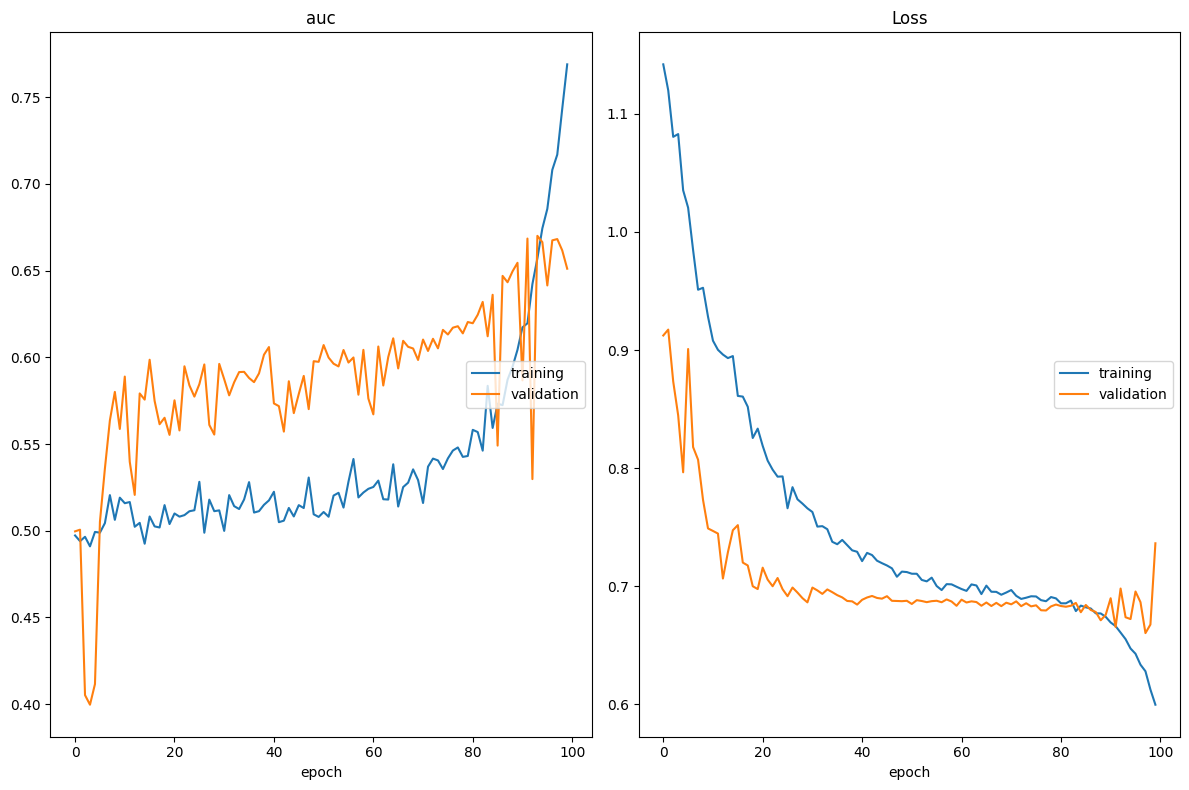

auc
	training         	 (min:    0.491, max:    0.769, cur:    0.769)
	validation       	 (min:    0.400, max:    0.670, cur:    0.651)
Loss
	training         	 (min:    0.600, max:    1.142, cur:    0.600)
	validation       	 (min:    0.660, max:    0.917, cur:    0.736)
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - auc: 0.7663 - loss: 0.6010 - val_auc: 0.6511 - val_loss: 0.7364


In [29]:
model.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          epochs=100,
          callbacks=[PlotLossesKeras()])

In [30]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.regularizers import l2

In [31]:
model = Sequential()
model.add(Embedding(input_dim=len(vocabulary) + 1, output_dim=13, input_length=max_len))
model.add(LSTM(16, kernel_regularizer=l2(0.01)))  # L2 con un factor de penalización de 0.01
model.add(Dropout(0.8))  # Dropout del 50%
model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.01)))  # L2 con un factor de penalización de 0.01
model.add(Dropout(0.7))  # Dropout del 50%
model.add(Dense(1, activation='sigmoid'))

# Create the optimizer
import keras.optimizers as opts
learning_rate = 0.00005
op = opts.Adam(learning_rate=learning_rate)

model.compile(loss='binary_crossentropy', optimizer=op, metrics=['auc'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

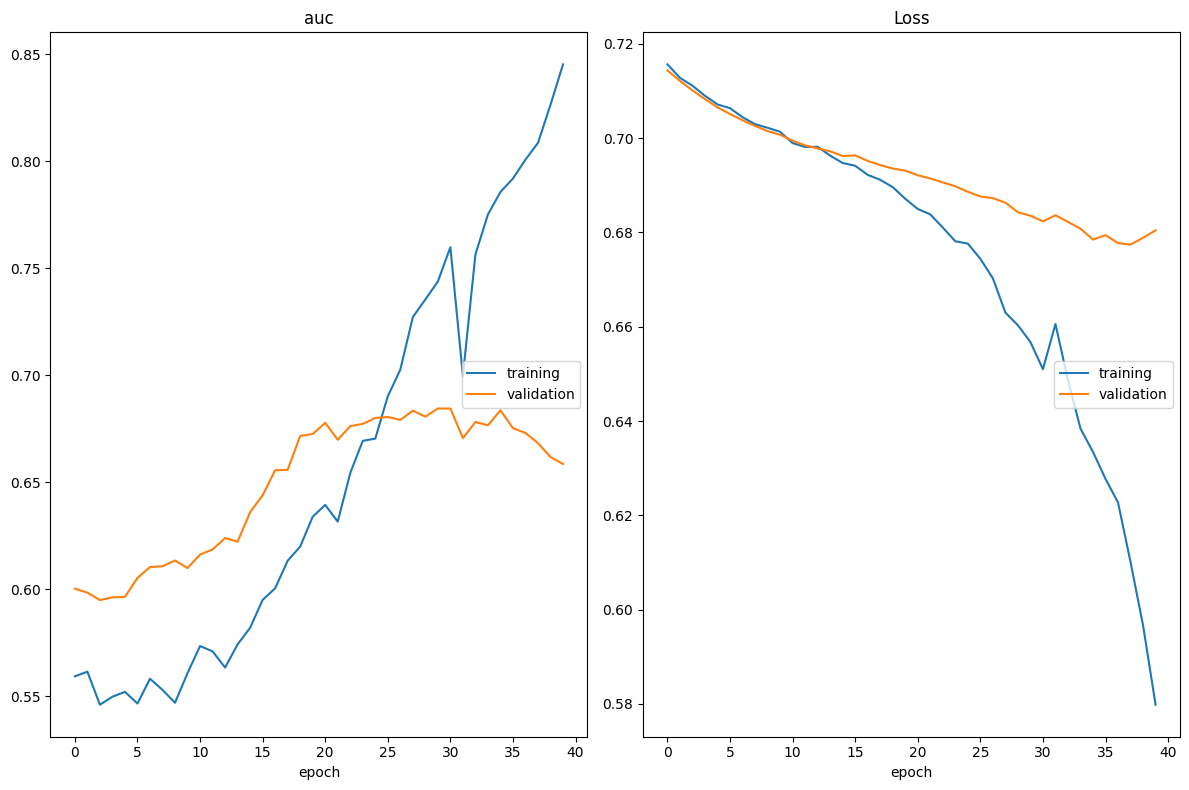

auc
	training         	 (min:    0.546, max:    0.845, cur:    0.845)
	validation       	 (min:    0.595, max:    0.684, cur:    0.658)
Loss
	training         	 (min:    0.580, max:    0.716, cur:    0.580)
	validation       	 (min:    0.677, max:    0.714, cur:    0.680)
173/173 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - auc: 0.8442 - loss: 0.5830 - val_auc: 0.6585 - val_loss: 0.6805


In [33]:
model.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          epochs=40,
          batch_size=32,
          callbacks=[PlotLossesKeras()])